In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [3]:
cont = data[['price','bathrooms','waterfront','view','condition','grade','sqft_living','bedrooms','sqft_lot', 'floors','sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15']]
cont.head()
y = data['price']
x_bathroom = np.linspace(0,10,11)
x_sqftliving = np.linspace(0,20000,21)

/mnt/lovelace/software/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.2719384421598913

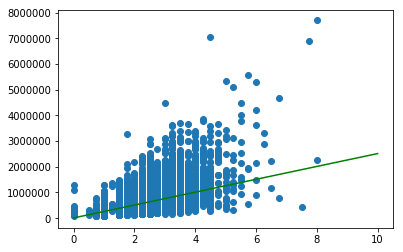

In [4]:
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt


model = LinearRegression()
model.fit(data['bathrooms'][:,np.newaxis], y)

yfit = model.predict(x_bathroom[:, np.newaxis])


plt.scatter(data['bathrooms'], y)
plt.plot(x_bathroom, yfit, color = 'green')


cross_val_score(model, data['bathrooms'][:,np.newaxis], y, cv = 10).mean()

In [5]:
from sklearn.linear_model import Ridge

model1 =Ridge(alpha= 3)
model1.fit(data['bathrooms'][:,np.newaxis], y)
yfit1 = model1.predict(x_bathroom[:, np.newaxis])
cross_val_score(model1, data['bathrooms'][:,np.newaxis], y, cv = 10).mean()

0.2719403776893337

In [6]:
from sklearn.linear_model import Lasso

model2 =Lasso(alpha= 5)
model2.fit(data['bathrooms'][:,np.newaxis], y)
yfit2 = model2.predict(x_bathroom[:, np.newaxis])
cross_val_score(model2, data['bathrooms'][:,np.newaxis], y, cv = 10).mean()

0.27193868535166554

In [7]:
model3 =Ridge(alpha= 2)
model3.fit(data['sqft_living'][:,np.newaxis], y)
yfit3 = model3.predict(x_sqftliving[:, np.newaxis])

cross_val_score(model3, data['sqft_living'][:,np.newaxis], y, cv = 10).mean()

0.48941997567153417

In [8]:
model4 =Lasso(alpha= 0.0001)
model4.fit(data['sqft_living'][:,np.newaxis], y)
yfit4 = model4.predict(x_sqftliving[:, np.newaxis])
cross_val_score(model4, data['sqft_living'][:,np.newaxis], y, cv = 10).mean()

0.48941997567052004

In [9]:
model5 =LinearRegression()
model5.fit(data['sqft_living'][:,np.newaxis], y)
yfit5 = model4.predict(x_sqftliving[:, np.newaxis])
cross_val_score(model4, data['sqft_living'][:,np.newaxis], y, cv = 10).mean()

0.48941997567052004

0.36300107730783426

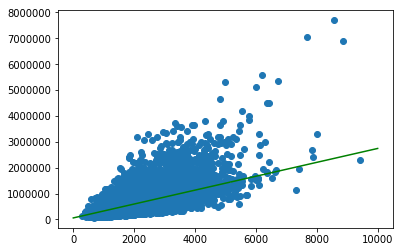

In [10]:
x_sqft_above = np.linspace(0,10000,11)
model.fit(data['sqft_above'][:,np.newaxis],y)
yfit_sqft_above = model.predict(x_sqft_above[:, np.newaxis])

plt.scatter(data['sqft_above'],y)
plt.plot(x_sqft_above, yfit_sqft_above, color = 'green')

cross_val_score(model,data['sqft_above'][:,np.newaxis],y, cv = 10).mean()


In [11]:
data['sqft_living'].corr(data['sqft_living15'])


0.7564202590172211

0.34114844597163685

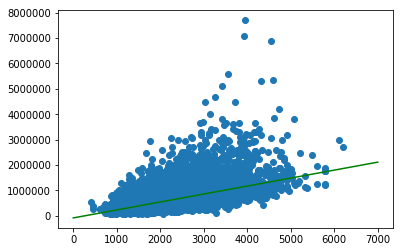

In [12]:
x_sqftliving15 = np.linspace(0,7000, 8)

model.fit(data['sqft_living15'][:,np.newaxis], y)
yfit_sqft_living15 = model.predict(x_sqftliving15[:, np.newaxis])

plt.scatter(data['sqft_living15'],y)
plt.plot(x_sqftliving15, yfit_sqft_living15, color = 'green')
cross_val_score(model, data['sqft_living15'][:,np.newaxis], y, cv = 10).mean()


0.09161765032300821

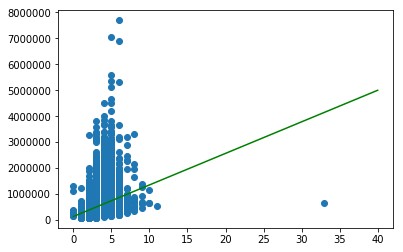

In [13]:
x_bedroom = np.linspace(0,40, 15)

model.fit(data['bedrooms'][:,np.newaxis], y)
yfit_bedroom = model.predict(x_bedroom[:, np.newaxis])

plt.scatter(data['bedrooms'],y)
plt.plot(x_bedroom, yfit_bedroom, color = 'green')
cross_val_score(model, data['bedrooms'][:,np.newaxis], y, cv = 10).mean()

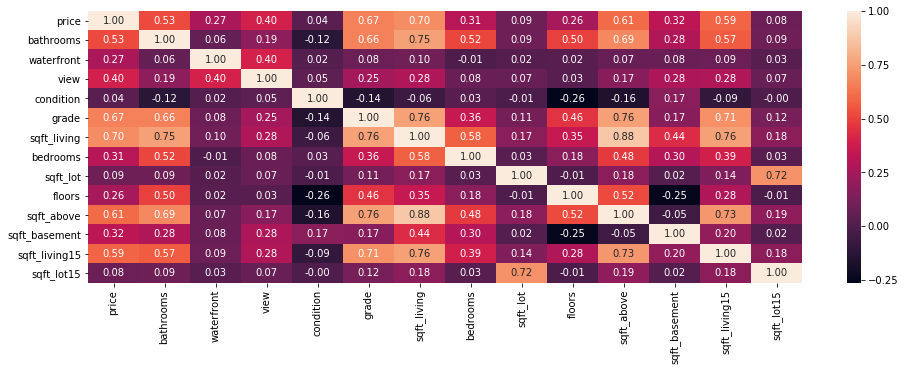

In [14]:
import seaborn as sps

plt.figure(figsize = (16,5))
sps.heatmap(cont.corr(), annot = True,fmt= '0.2f')

In [15]:
from sklearn.preprocessing import OneHotEncoder
O = OneHotEncoder()

zipp = data['zipcode']
zipp = O.fit_transform(zipp[:, np.newaxis]).toarray()
model.fit(zipp, y)

yfit_zip = model.predict(zipp)

cross_val_score(model, yfit_zip[:, np.newaxis], y, cv= 10).mean()

0.4068245459190146

In [16]:
from sklearn.metrics import r2_score

r2_score(data['price'].values, yfit_zip, multioutput= 'variance_weighted')

0.4072969836891714

In [17]:
final = data[['bathrooms','grade','sqft_living','sqft_above','sqft_living15']]
model = LinearRegression()
model.fit(final, y)
yfit_final = model.predict(final)
cross_val_score(model, yfit_final[:, np.newaxis],y, cv = 10).mean()

0.5415960607467193

In [18]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 6)
final11 = poly.fit_transform(final)
model11 = LinearRegression().fit(final11,y)
yfit_final2 = model11.predict(final11)
cross_val_score(model11, yfit_final2[:, np.newaxis], y, cv =10).mean()

0.6720148033902131

In [20]:
cont.columns

Index(['price', 'bathrooms', 'waterfront', 'view', 'condition', 'grade',
       'sqft_living', 'bedrooms', 'sqft_lot', 'floors', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [22]:
from sklearn import tree

model1= tree.DecisionTreeRegressor()
model1.fit(cont, y)
yfit = model1.predict(cont)

In [24]:
cross_val_score(model1, cont, y, cv = 10).mean()

0.9993767163649749